# Classifying Dogs vs. Cats Images (CNN)
#### El conjunto de datos Dogs vs. Cats es ampliamente utilizado en aprendizaje profundo para la clasificación de imágenes. Este dataset contiene fotografías de perros y gatos, lo que permite entrenar un modelo de clasificación binaria para distinguir entre ambas categorías. Este dataset contiene:
#### - Imágenes de entrenamiento de perros y gatos.
#### - Imágenes de validación para evaluar el rendimiento del modelo.
#### - Cada imagen está representada en formato RGB con resolución de 150 × 150 píxeles.

## Importar librerías

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import random
from tensorflow.keras.preprocessing.image import load_img


## Descargar y Extraer el Dataset

In [18]:
# Verificar si el archivo ZIP se descargó
dataset_path = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered.zip")
print("Existe el archivo ZIP:", os.path.exists(dataset_path))

Existe el archivo ZIP: True


In [19]:
# Definir la ruta de extracción
extract_path = os.path.expanduser("~/.keras/datasets/")

# Extraer el archivo
with zipfile.ZipFile(dataset_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracción completada.")

Extracción completada.


In [20]:
base_dir = os.path.expanduser("~/.keras/datasets/cats_and_dogs_filtered/")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

print("Existe train_dir:", os.path.exists(train_dir))
print("Existe validation_dir:", os.path.exists(validation_dir))

# Verificar las carpetas de gatos y perros dentro del conjunto de entrenamiento
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

print("Existe train_cats_dir:", os.path.exists(train_cats_dir))
print("Existe train_dogs_dir:", os.path.exists(train_dogs_dir))


Existe train_dir: True
Existe validation_dir: True
Existe train_cats_dir: True
Existe train_dogs_dir: True


In [21]:
# Descargar y extraer el conjunto de datos
base_dir = keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)
base_dir = os.path.join(os.path.dirname(base_dir), 'cats_and_dogs_filtered')

# Directorios de entrenamiento y validación
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorios específicos para cada clase
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Verificar la cantidad de imágenes en cada clase
print(f"Número de imágenes de gatos en entrenamiento: {len(os.listdir(train_cats_dir))}")
print(f"Número de imágenes de perros en entrenamiento: {len(os.listdir(train_dogs_dir))}")
print(f"Número de imágenes de gatos en validación: {len(os.listdir(validation_cats_dir))}")
print(f"Número de imágenes de perros en validación: {len(os.listdir(validation_dogs_dir))}")


Número de imágenes de gatos en entrenamiento: 1000
Número de imágenes de perros en entrenamiento: 1000
Número de imágenes de gatos en validación: 500
Número de imágenes de perros en validación: 500


## Visualizar Algunas Imágenes del Dataset

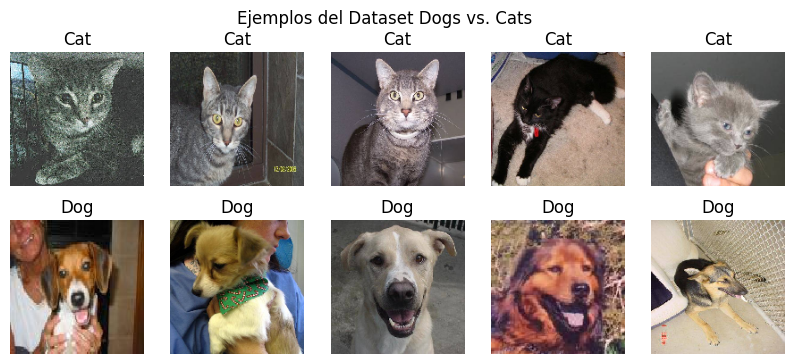

In [22]:
# Mostrar algunas imágenes aleatorias
plt.figure(figsize=(10, 4))
for i, img_name in enumerate(random.sample(os.listdir(train_cats_dir), 5)):
    img_path = os.path.join(train_cats_dir, img_name)
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Cat")

for i, img_name in enumerate(random.sample(os.listdir(train_dogs_dir), 5)):
    img_path = os.path.join(train_dogs_dir, img_name)
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Dog")

plt.suptitle("Ejemplos del Dataset Dogs vs. Cats")
plt.show()


## Preprocesamiento de Datos

In [23]:
# Generadores de imágenes con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Definición y entrenamiento del modelo

In [27]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4900 - loss: 0.7399 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4690 - loss: 0.6952 - val_accuracy: 0.5940 - val_loss: 0.6921
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5799 - loss: 0.6881 - val_accuracy: 0.5760 - val_loss: 0.6897
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5418 - loss: 0.6870 - val_accuracy: 0.5010 - val_loss: 0.6914
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5064 - loss: 0.6930 - val_accuracy: 0.5790 - val_loss: 0.6918
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5558 - loss: 0.6919 - val_accuracy: 0.5980 - val_loss: 0.6808
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5463 - loss: 0.6863 - val_accuracy: 0.6100 - val_loss: 0.6865
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5731 - loss: 0.6845 - val_accuracy: 0.6030 - v

## Evaluar el modelo

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6174 - loss: 0.6643

Precisión en validación: 0.6200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


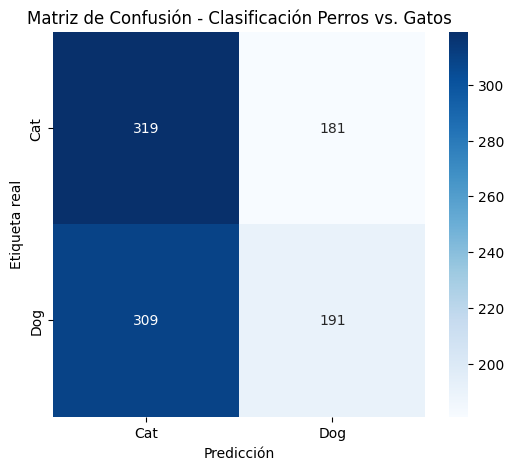


Reporte de clasificación:
              precision    recall  f1-score   support

         Cat       0.51      0.64      0.57       500
         Dog       0.51      0.38      0.44       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



In [28]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(validation_generator)
print(f"\nPrecisión en validación: {test_acc:.4f}")

y_pred_prob = model.predict(validation_generator)
y_pred = (y_pred_prob > 0.5).astype('int32')
y_true = validation_generator.classes

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Clasificación Perros vs. Gatos")
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))